### Import Packages

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 
# Adjusts the configuurationof the plots I am going to use 


### Load Data

In [2]:
df_raw = pd.read_csv('movies.csv')
df_raw.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Copy the dataset
df = df_raw
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#look at the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
#look for NAN
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
#Droping nan that cant be populated with central tendancies
df = df.dropna(subset=['company', 'country', 'star', 'writer', 'released', 'rating'])

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')
imputer = imputer.fit(df.loc[:, ['runtime','gross','votes','score','budget']])
df.loc[:, ['runtime','gross','votes','score','budget']] = imputer.transform(df.loc[:, ['runtime','gross','votes','score','budget']])

/var/folders/7n/1t4h5jsd6vn85d_1pdtpwtb40000gn/T/ipykernel_32912/3659053170.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, ['runtime','gross','votes','score','budget']] = imputer.transform(df.loc[:, ['runtime','gross','votes','score','budget']])


In [8]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [9]:
#Look at the data type of the dataset
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
#Changing the datatypes
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')

/var/folders/7n/1t4h5jsd6vn85d_1pdtpwtb40000gn/T/ipykernel_32912/795479603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'] = df['budget'].astype('int64')
/var/folders/7n/1t4h5jsd6vn85d_1pdtpwtb40000gn/T/ipykernel_32912/795479603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gross'] = df['gross'].astype('int64')
/var/folders/7n/1t4h5jsd6vn85d_1pdtpwtb40000gn/T/ipykernel_32912/795479603.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [12]:
#Update add yearupdate to the dataset
df['yearupdate'] = df['released'].str.extract(pat='([0-9]{4})').astype(int)

/var/folders/7n/1t4h5jsd6vn85d_1pdtpwtb40000gn/T/ipykernel_32912/2597948055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yearupdate'] = df['released'].str.extract(pat='([0-9]{4})').astype(int)


In [13]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearupdate
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [14]:
#look at the movie with the highest gross
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [15]:
#drop duplicate values 
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearupdate
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,21000000,1672,Polygram Filmed Entertainment,87,1998
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,21000000,1605,Balboa Entertainment,110,1996
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,21000000,1400,British Broadcasting Corporation (BBC),103,2001
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,21000000,682,Roxwell Films,93,2020


In [16]:
# Budget high correlation 
# Company high. correlation 

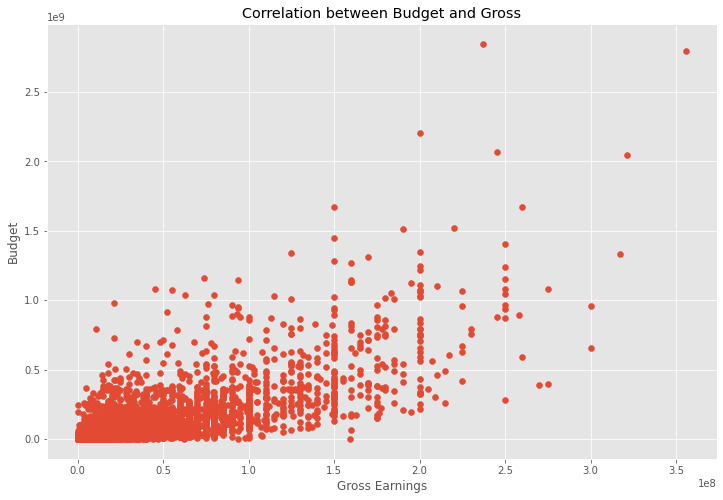

In [17]:
#scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Correlation between Budget and Gross')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()

In [18]:
df_cor = df.loc[:,['votes','score', 'budget','gross','runtime','yearupdate']]

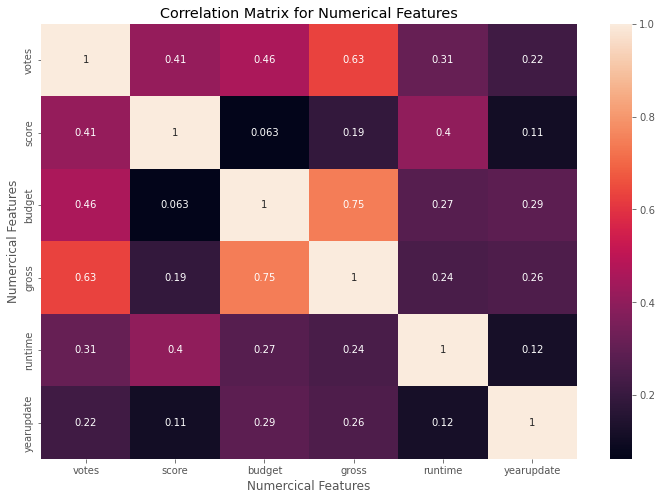

In [19]:
#create correlation matrix
corr_matrix = df_cor.corr('pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numerical Features')
plt.xlabel('Numercical Features')
plt.ylabel('Numercical Features')
plt.show()

In [20]:
#look at the unique values in the column company 
pd.unique(df['company'])

array(['Twentieth Century Fox', 'Marvel Studios', 'Lucasfilm', ...,
       'Cinema Libre Studio', 'Balboa Entertainment', 'Daybreak'],
      dtype=object)

In [21]:
df_dummy = df
for col_name in df_dummy.columns:
    if(df_dummy[col_name].dtype == 'object'):
        df_dummy[col_name] = df_dummy[col_name].astype('category')
        df_dummy[col_name]=df_dummy[col_name].cat.codes

In [22]:
df_dummy.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearupdate
5445,527,5,0,2009,688,7.8,1100000,1137,1757,2284,55,237000000,2847246203,2209,162,2009
7445,529,5,0,2019,180,8.4,903000,160,730,2193,55,356000000,2797501328,1572,181,2019
3045,6813,5,6,1997,696,7.8,1100000,1137,1757,1560,55,200000000,2201647264,2209,194,1997
6663,5077,5,0,2015,690,7.8,876000,1107,2519,508,55,245000000,2069521700,1506,138,2015
7244,530,5,0,2018,189,8.4,897000,160,730,2193,55,321000000,2048359754,1572,149,2018


pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [23]:
corr_matrix = df_dummy.corr('pearson')
corr_pairs = corr_matrix.unstack()
sort_corr = corr_pairs.sort_values()
sort_corr

genre       budget       -0.335141
budget      genre        -0.335141
genre       gross        -0.240298
gross       genre        -0.240298
votes       genre        -0.148381
                            ...   
year        year          1.000000
genre       genre         1.000000
rating      rating        1.000000
runtime     runtime       1.000000
yearupdate  yearupdate    1.000000
Length: 256, dtype: float64

In [24]:
sort_corr[(sort_corr)>.5]

gross       votes         0.632333
votes       gross         0.632333
gross       budget        0.745711
budget      gross         0.745711
yearupdate  year          0.997468
year        yearupdate    0.997468
name        name          1.000000
company     company       1.000000
gross       gross         1.000000
budget      budget        1.000000
country     country       1.000000
star        star          1.000000
writer      writer        1.000000
director    director      1.000000
votes       votes         1.000000
score       score         1.000000
released    released      1.000000
year        year          1.000000
genre       genre         1.000000
rating      rating        1.000000
runtime     runtime       1.000000
yearupdate  yearupdate    1.000000
dtype: float64

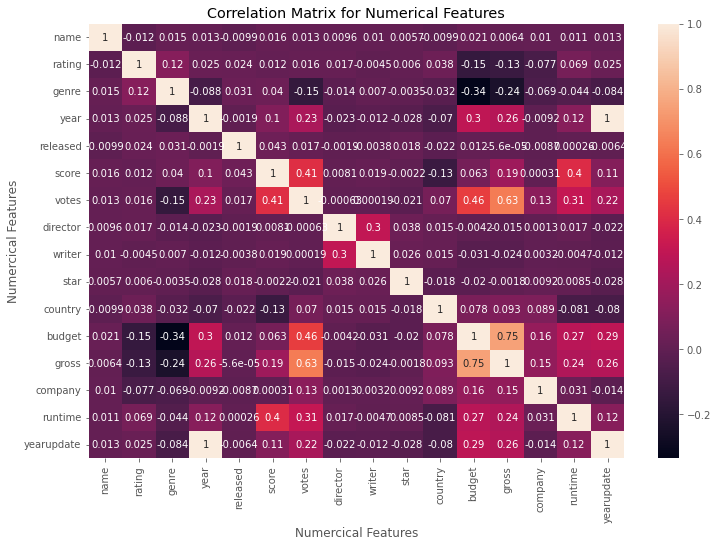

In [25]:
corr_matrix = df_dummy.corr('pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numerical Features')
plt.xlabel('Numercical Features')
plt.ylabel('Numercical Features')
plt.show()

In [26]:
pd.unique(df_dummy['company'])

array([2209, 1572, 1506, ...,  656,  327,  800], dtype=int16)

### Votes and Budget has the highest correlation with gross earning 